# Startup Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup_funding=pd.read_csv('datasets/startup_funding.csv')

##### Question 1. Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [2]:
df=startup_funding.copy()

In [3]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
df = df[df['CityLocation'].notna()] #dropping missing values

### A function to get 1st city in case multiple are given

In [5]:
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(separateCity)

### Replacing bangalore with Bangalore

In [6]:
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

### Replacing Delhi with New Delhi

In [7]:
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)

### Getting number of times different cities recieved funding

In [8]:
banglore=(df['CityLocation']=='Bangalore').value_counts()[True]

In [9]:
new_delhi=(df['CityLocation']=='New Delhi').value_counts()[True]

In [10]:
gurgaon=(df['CityLocation']=='Gurgaon').value_counts()[True]

In [11]:
noida=(df['CityLocation']=='Noida').value_counts()[True]

### NCR is union of three cities

In [12]:
ncr=new_delhi+gurgaon+noida

In [13]:
mumbai=(df['CityLocation']=='Mumbai').value_counts()[True]

In [14]:
banglore

635

In [15]:
mumbai

449

In [16]:
ncr

709

## So NCR has received funding maximum number of times that 709 times

## Making bar graph between cities and number of time they have recieved funding

In [17]:
x=['Banglore','Mumbai','NCR']
y=[635,449,709]

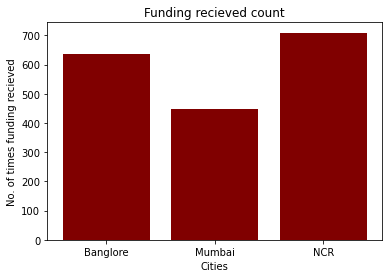

In [18]:
plt.bar(x,y,color='maroon')
plt.xlabel("Cities")
plt.ylabel("No. of times funding recieved")
plt.title("Funding recieved count")
plt.show()

##### Question 2 Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [19]:
df=startup_funding.copy()

### Cleaning InvestorName column's data

In [20]:
df.dropna(subset=["InvestorsName"],inplace=True)

In [21]:
invester  =  df["InvestorsName"].str.split(',')

In [22]:
newarray =  [j.strip() for sub in invester for j in sub]

### nameseries contains count of number of times each particular investor invested

In [23]:
nameseries =  pd.Series(newarray).value_counts()

### top5Investors contains top 5 investors (in terms of number of times invested)

In [24]:
top5Investors=nameseries[:5]

In [25]:
print("Top 5 Investors are ")
print(top5Investors)

Top 5 Investors are 
Sequoia Capital         64
Accel Partners          53
Kalaari Capital         44
SAIF Partners           41
Indian Angel Network    40
dtype: int64


## So, Top 5 investors are :
### Sequoia Capital         64
### Accel Partners          53
### Kalaari Capital         44
### SAIF Partners           41
### Indian Angel Network    40

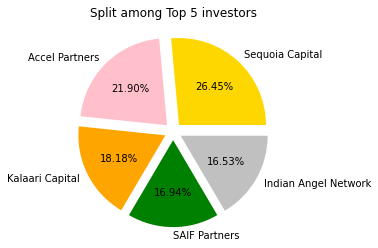

In [26]:
total=(64+53+44+41+40)/100
sizes=[64/total,53/total,44/total,41/total,40/total]
labels=['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'SAIF Partners', 'Indian Angel Network']
colors=["gold","pink","orange","green","silver"]
explode=[.1,.1,.1,.1,.1]
plt.title("Split among Top 5 investors")
plt.pie(sizes,colors=colors,labels=labels,autopct="%.2f%%",explode=explode)
plt.show()

#####  Question3 After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [27]:
df=startup_funding.copy()

### Cleaning StartupName column data for important startups : Ola, Flipkart, Oyo and Paytm.

In [28]:
df = df[df['StartupName'].notna()]
df['StartupName'].replace("Flipkart.com","Flipkart",inplace=True)
df['StartupName'].replace("Oyo Rooms","Oyo",inplace=True)
df['StartupName'].replace("Olacabs","Ola",inplace=True)
df['StartupName'].replace("Ola Cabs","Ola",inplace=True)
df['StartupName'].replace("Paytm Marketplace","Paytm",inplace=True)
df['StartupName'].replace("Oyorooms","Oyo",inplace=True)
df['StartupName'].replace("OyoRooms","Oyo",inplace=True)
df['StartupName'].replace("OYO Rooms","Oyo",inplace=True)

### Cleaning InvestorName column's data

In [29]:
df.dropna(subset=["InvestorsName"],inplace=True)

### pairs is a set which will contain tuples (investor name,startup in which he invested) so that we don't count a investor investing in same company at different points of time more than once.
### top_investors is an array and will conatin investor names

In [30]:
top_investors=[]
pairs=set()
for i in range(len(df)):
    invester  =  df.iloc[i]["InvestorsName"].split(',')
    for j in range(len(invester)):
        invester[j]=invester[j].strip()
        if invester[j]=='':
            continue
        pair=(invester[j],df.iloc[i]["StartupName"])
        if pair in pairs:
            continue
        else:
            pairs.add(pair)
            top_investors.append(invester[j])

In [31]:
nameseries =  pd.Series(top_investors).value_counts()

### Extracting top 5 investors from nameseries in top5Investors

In [32]:
top5Investors=nameseries[:5]

In [33]:
print("Top 5 Investors are ")
print(top5Investors)

Top 5 Investors are 
Sequoia Capital         48
Accel Partners          47
Kalaari Capital         41
Indian Angel Network    40
Blume Ventures          36
dtype: int64


## So, Top 5 investors are :
### Sequoia Capital         48
### Accel Partners          47
### Kalaari Capital         41
### Indian Angel Network    40
### Blume Ventures          36

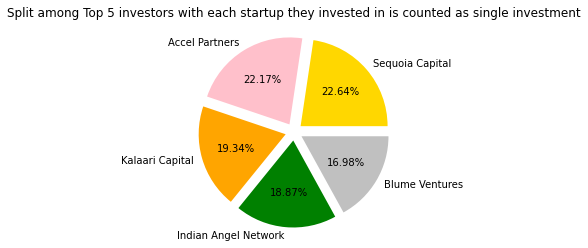

In [34]:
total=(48+47+41+40+36)/100
sizes=[48/total,47/total,41/total,40/total,36/total]
labels=['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'Indian Angel Network','Blume Ventures']
colors=["gold","pink","orange","green","silver"]
explode=[.1,.1,.1,.1,.1]
plt.title("Split among Top 5 investors with each startup they invested in is counted as single investment")
plt.pie(sizes,colors=colors,labels=labels,autopct="%.2f%%",explode=explode)
plt.show()

##### 4 Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [35]:
df=startup_funding.copy()

### Correcting inestment types (the ones we need for current question)

In [36]:
df['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)
df = df[df['InvestmentType'].notna()]

In [37]:
df.dropna(subset=["InvestorsName"],inplace=True)

### topInvestors is a dictionary containing count of number of times an investor invested with  InvestmentType as Seed Funding or Crowd Funding

In [38]:
topInvestors={}
for i in range(len(df)):
    if df.iloc[i]['InvestmentType']=='Seed Funding' or df.iloc[i]['InvestmentType']=='Crowd Funding':
        invester  =  df.iloc[i]["InvestorsName"].split(',')
        for j in range(len(invester)):
            invester[j]=invester[j].strip()
            if invester[j]=='' or invester[j]=='Undisclosed investors' or invester[j]=='Undisclosed Investors':
                continue
            if invester[j] in topInvestors:
                topInvestors[invester[j]]+=1
            else:
                topInvestors[invester[j]]=1

### importing itemgetter to sort dictionary topInvestors and get top 5 investors in res

In [39]:
from operator import itemgetter

In [40]:
res = dict(sorted(topInvestors.items(), key = itemgetter(1), reverse = True)[:5])
for i in res:
    print(i,res[i])

Indian Angel Network 33
Rajan Anandan 25
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 15


## So top 5 investors with their investment type as Seed Funding or Crowd Funding are :
## Indian Angel Network, Rajan Anandan, LetsVenture, Anupam Mittal, Group of Angel Investors.

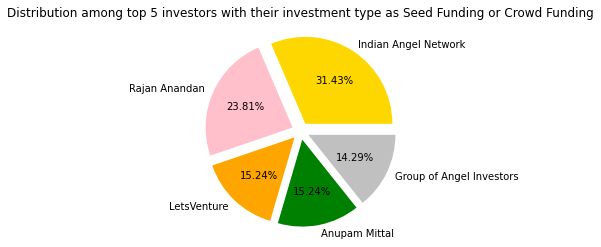

In [41]:
total=(33+25+16+16+15)/100
sizes=[33/total,25/total,16/total,16/total,15/total]
labels=['Indian Angel Network', 'Rajan Anandan', 'LetsVenture', 'Anupam Mittal','Group of Angel Investors']
colors=["gold","pink","orange","green","silver"]
explode=[.1,.1,.1,.1,.1]
plt.title("Distribution among top 5 investors with their investment type as Seed Funding or Crowd Funding")
plt.pie(sizes,colors=colors,labels=labels,autopct="%.2f%%",explode=explode)
plt.show()

##### Question 5 Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [42]:
df=startup_funding.copy()

### Correcting inestment types (the ones we need for current question)

In [43]:
df['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df = df[df['InvestmentType'].notna()]

In [44]:
df.dropna(subset=["InvestorsName"],inplace=True)

### topInvestors is a dictionary containing count of number of times an investor invested with InvestmentType as Private Equity

In [45]:
topInvestors={}
for i in range(len(df)):
    if df.iloc[i]['InvestmentType']=='Private Equity':
        invester  =  df.iloc[i]["InvestorsName"].split(',')
        for j in range(len(invester)):
            invester[j]=invester[j].strip()
            if invester[j]=='' or invester[j]=='Undisclosed investors' or invester[j]=='Undisclosed Investors':
                continue
            if invester[j] in topInvestors:
                topInvestors[invester[j]]+=1
            else:
                topInvestors[invester[j]]=1

In [46]:
res = dict(sorted(topInvestors.items(), key = itemgetter(1), reverse = True)[:5])
for i in res:
    print(i,res[i])

Sequoia Capital 59
Accel Partners 47
Kalaari Capital 38
SAIF Partners 35
Blume Ventures 29


## So top 5 investors with their investment type as Private Equity are : Sequoia Capital, Accel Partners, Kalaari Capital, SAIF Partners, Blume Ventures.

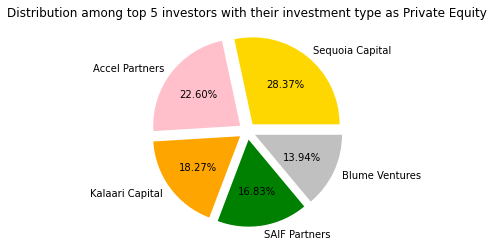

In [47]:
total=(59+47+38+35+29)/100
sizes=[59/total,47/total,38/total,35/total,29/total]
labels=['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'SAIF Partners', 'Blume Ventures']
colors=["gold","pink","orange","green","silver"]
explode=[.1,.1,.1,.1,.1]
plt.title("Distribution among top 5 investors with their investment type as Private Equity")
plt.pie(sizes,colors=colors,labels=labels,autopct="%.2f%%",explode=explode)
plt.show()